In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.stats as stats

In [2]:
%matplotlib inline

# 4.1 Understanding the Model
## 4.1.1 Differential Spectrum

In [3]:
# Global Constants
C = 1.433488e-13     # Prefactor
me = 0.51099895000e6  # Electron mass in eV
alpha = 1/137        # Fine structure constant in natural units



In [4]:
def fermi_function(beta: float) -> float:
    eta = (2*alpha)/beta
    return (2*np.pi*eta)/(1-np.exp(-2*np.pi*eta))*(1.002037-0.001427*beta)   # Formula for fermi function

In [5]:
def differential_spectrum(E: float, mnu2: float, E0: float) -> float:
    # Calculate approximations
    Etot = E + me
    p = np.sqrt(Etot**2 - me**2)
    beta = Etot/p
    F = fermi_function(beta)
    # Calculate mnu
    mnu = np.sqrt(mnu2*np.heaviside(mnu2, 0))
    # Calculation differential rate
    return np.nan_to_num(C*F*p*(E+me)*(E0-E)*np.sqrt((E0-E)**2-mnu2)) * np.heaviside(E0-E-mnu, 1) # formula for the differential spectrum

/tmp/ipykernel_152082/3479775738.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(C*F*p*(E+me)*(E0-E)*np.sqrt((E0-E)**2-mnu2)) * np.heaviside(E0-E-mnu, 1) # formula for the differential spectrum


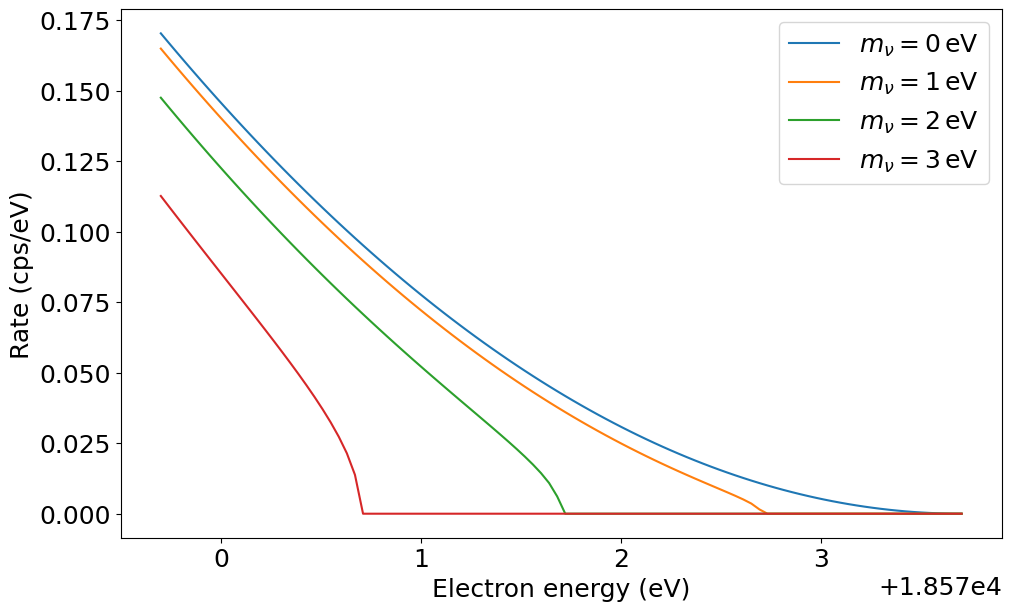

In [6]:
# positive neutrino masses
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
E = np.linspace(18569.7, 18573.7, num=100) # energy values where the differential spectrum is evaluated
for mnu in [0, 1, 2, 3]:
    y = differential_spectrum(E=E, mnu2=mnu**2, E0=18573.7)
    ax.plot(E, y, '-', label=r"$m_{\nu}=$"+f"{mnu:.0f}"+r"$\,$eV");
ax.legend();
plt.locator_params(axis='x', nbins=5);
ax.set_ylabel("Rate (cps/eV)")
ax.set_xlabel("Electron energy (eV)");

fig.savefig("differential_spectrum.pdf")

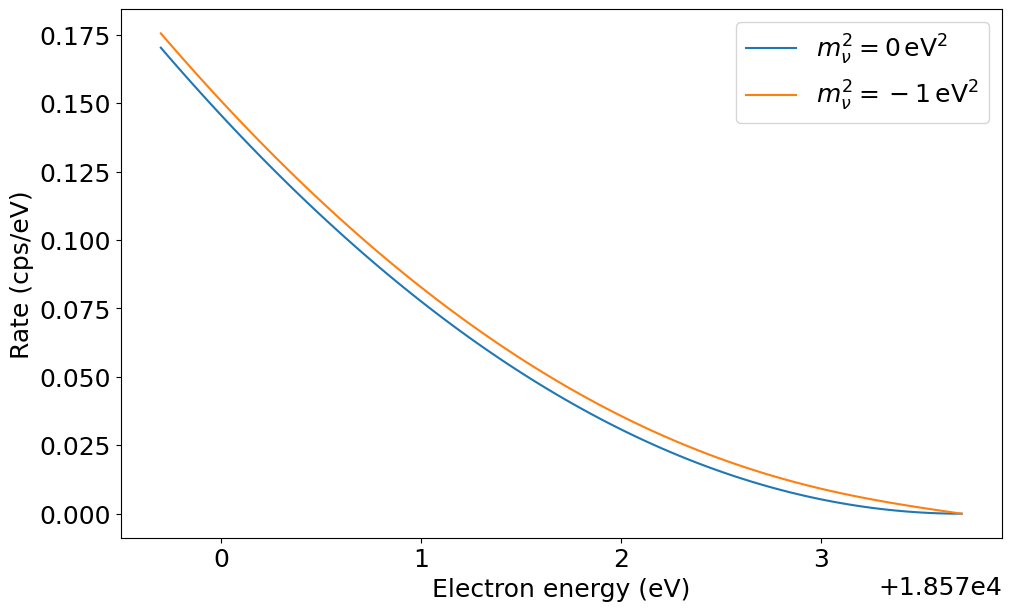

In [7]:
# negative neutrino mass
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
x = np.linspace(18569.7, 18573.7, num=100) # energy values where the differential spectrum is evaluated

y1 = differential_spectrum(E=x, mnu2=0, E0=18573.7)
ax.plot(x, y1, '-', label=r"$m_{\nu}^2=0\,$eV$^2$");

y2 = differential_spectrum(E=x, mnu2=-1, E0=18573.7)
ax.plot(x, y2, '-', label=r"$m_{\nu}^2=-1\,$eV$^2$");

ax.legend();
plt.locator_params(axis='x', nbins=5);
ax.set_ylabel("Rate (cps/eV)")
ax.set_xlabel("Electron energy (eV)");

fig.savefig("differential_spectrum_negative_mass.pdf")

#hits 0 at the same time because of (E-E_0) Term in diff spect. but otherwise above the line for 0 mass

### 4.1.2 Transmission function ###

In [8]:
def transmission(qU, E, *, Bana=6.3*10**(-4), Bmax=4.23, Bsource=2.52) -> float:
    
    # Compute relativistic factor
    f = ((E-qU)/me +2 )/(E/me + 2)
    # Compute slope part of transmission
    T = np.nan_to_num( (1-np.sqrt(1-f*Bsource/Bana*(E-qU)/E) )/ (1-np.sqrt(1-Bsource/Bmax))   )
    # Put everything together with heaviside functions
    a=(f*Bmax)/(f*Bmax -Bana )
     
    return np.heaviside(E-qU, 1)*T*np.heaviside(qU*a-E,1)+np.heaviside(E-qU*a,0)

/tmp/ipykernel_152082/1860661297.py:6: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num( (1-np.sqrt(1-f*Bsource/Bana*(E-qU)/E) )/ (1-np.sqrt(1-Bsource/Bmax))   )


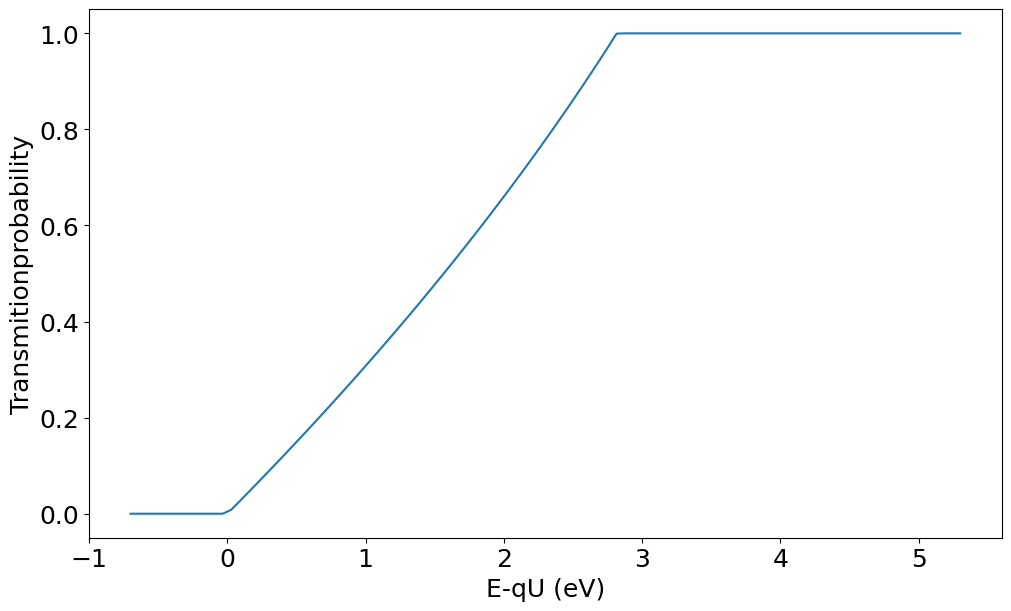

In [9]:
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = 18569.7
x=  np.linspace(18569, 18575, num=100)
y = transmission(qU=qU, E=x, Bana=6.3*10**(-4), Bmax=4.23, Bsource=2.52)
#x_Mattfragen = np.linspace(0, 4, 100)
ax.plot(x-qU , y, '-');
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("E-qU (eV)")
ax.set_ylabel("Transmitionprobability");

fig.savefig("transmission.pdf")


/tmp/ipykernel_152082/1860661297.py:6: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num( (1-np.sqrt(1-f*Bsource/Bana*(E-qU)/E) )/ (1-np.sqrt(1-Bsource/Bmax))   )


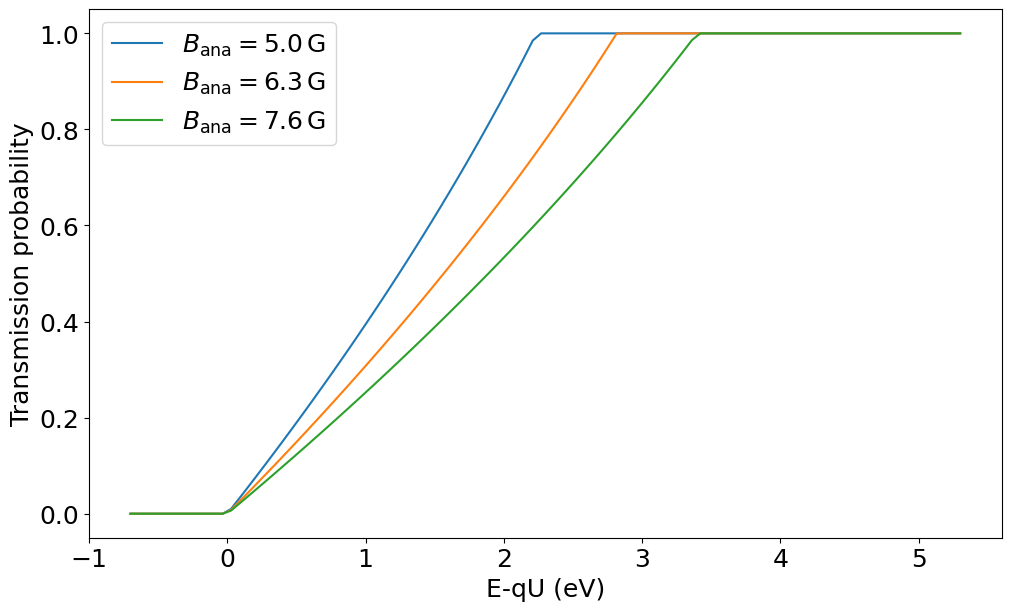

In [10]:
# transmission function for different Bana
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = 18569.7
x = np.linspace(18569,  18575, num=100)
Banas=np.array([5*10**(-4),6.3*10**(-4),7.6*10**(-4)])
for Bana in Banas:
    y = transmission(qU=qU, E=x, Bana=Bana, Bmax=4.23, Bsource=2.52)
    ax.plot(x-qU, y, '-', label=r"$B_{\mathrm{ana}}=%s \,$G"%f"{Bana*1E4:.1f}");

ax.legend();
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("E-qU (eV)")
ax.set_ylabel("Transmission probability");

fig.savefig("transmission_Bana.pdf")





/tmp/ipykernel_152082/1860661297.py:6: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num( (1-np.sqrt(1-f*Bsource/Bana*(E-qU)/E) )/ (1-np.sqrt(1-Bsource/Bmax))   )


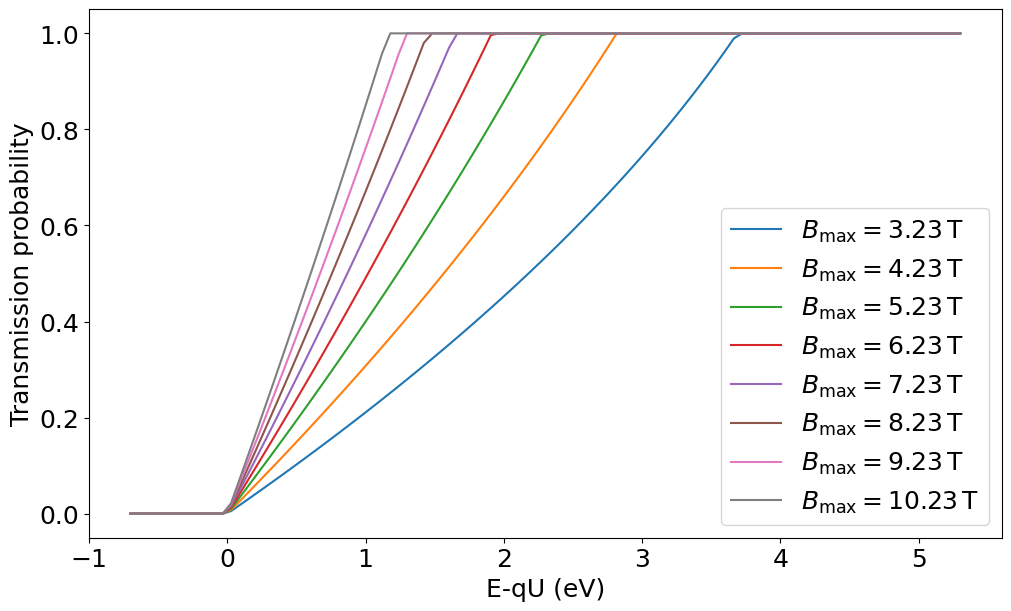

In [11]:
# transmission function for different Bmax
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = 18569.7
x = np.linspace(18569,  18575, num=100)
Bmaxs=np.array([3.23,4.23,5.23,6.23,7.23,8.23,9.23,10.23])
for Bmax in Bmaxs:
    y = transmission(qU=qU, E=x, Bana=6.3*10**(-4), Bmax=Bmax, Bsource=2.52)
    ax.plot(x-qU, y, '-', label=r"$B_{\mathrm{max}}=%s \,$T"%f"{Bmax:.2f}");

ax.legend();
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("E-qU (eV)")
ax.set_ylabel("Transmission probability");

fig.savefig("transmission_Bmax.pdf")

### 4.1.3 Dummy model ###

In [12]:
def integrated_spectrum(qU: float, mnu2: float, E0: float) -> float:
    # Define integrand
    def integrand(x: float) -> float:
        return differential_spectrum(E=x, mnu2=mnu2, E0=E0)*transmission(qU=qU, E=x)
    # Calculate the integral
    return integrate.quad(integrand, qU, E0)[0]

In [13]:
def dummy_model(qU: float, mnu2: float, E0: float, B: float, A: float) -> float:
    return A*integrated_spectrum(qU=qU, mnu2=mnu2, E0=E0)+ B

/tmp/ipykernel_152082/1860661297.py:6: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num( (1-np.sqrt(1-f*Bsource/Bana*(E-qU)/E) )/ (1-np.sqrt(1-Bsource/Bmax))   )
/tmp/ipykernel_152082/3479775738.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(C*F*p*(E+me)*(E0-E)*np.sqrt((E0-E)**2-mnu2)) * np.heaviside(E0-E-mnu, 1) # formula for the differential spectrum


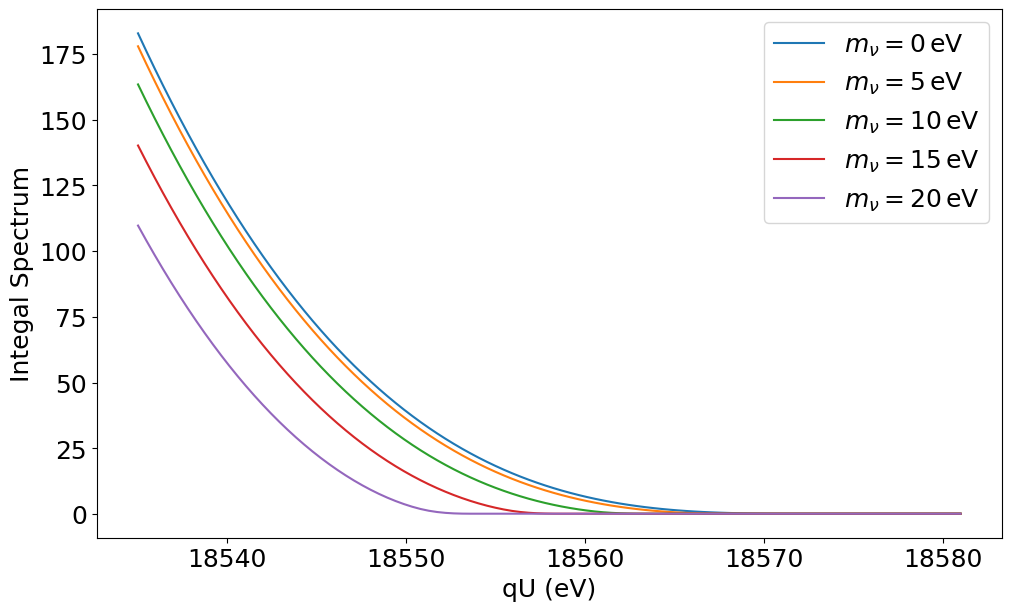

In [14]:
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

B1 = 0.2
A1 = 1
E01 = 18573.7
x = np.linspace(18535,  18581, num=100) ## also try changing the lower limit to see the difference

for mnu in [0,5, 10, 15, 20]:
    y = np.array([dummy_model(qU=_x, mnu2=mnu**2, E0=E01, B=B1, A=A1) for _x in x])
    ax.plot(x, y, '-', label=r"$m_{\nu}=$"+f"{mnu:.0f}"+r"$\,$eV");
ax.legend();
plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("qU (eV)")
ax.set_ylabel("Integal Spectrum");

fig.savefig("integrated_spectrum.pdf")

In [15]:
# Define parameters for Rchanged (use lists)
mnu2s = np.array([0,0.5,1])
#mnu2=1
E0s = np.array([18573.7,18573.6,18573.8])
#E0=18573.8
As = np.array([1,0.9,1.1])
#A=1.1
Bs = np.array([0.2,0.19,0.210]) #mcps, brauchen wirs in cps?
#B=210

# Compute reference model
x = np.linspace(18535,  18581, num=100) ## also try changing the lower limit to see the difference
yref = np.array([dummy_model(qU=_x, mnu2=0, E0=18573.7, B=0.2, A=1) for _x in x])

/tmp/ipykernel_152082/1860661297.py:6: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num( (1-np.sqrt(1-f*Bsource/Bana*(E-qU)/E) )/ (1-np.sqrt(1-Bsource/Bmax))   )


/tmp/ipykernel_152082/1860661297.py:6: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num( (1-np.sqrt(1-f*Bsource/Bana*(E-qU)/E) )/ (1-np.sqrt(1-Bsource/Bmax))   )
/tmp/ipykernel_152082/3479775738.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(C*F*p*(E+me)*(E0-E)*np.sqrt((E0-E)**2-mnu2)) * np.heaviside(E0-E-mnu, 1) # formula for the differential spectrum


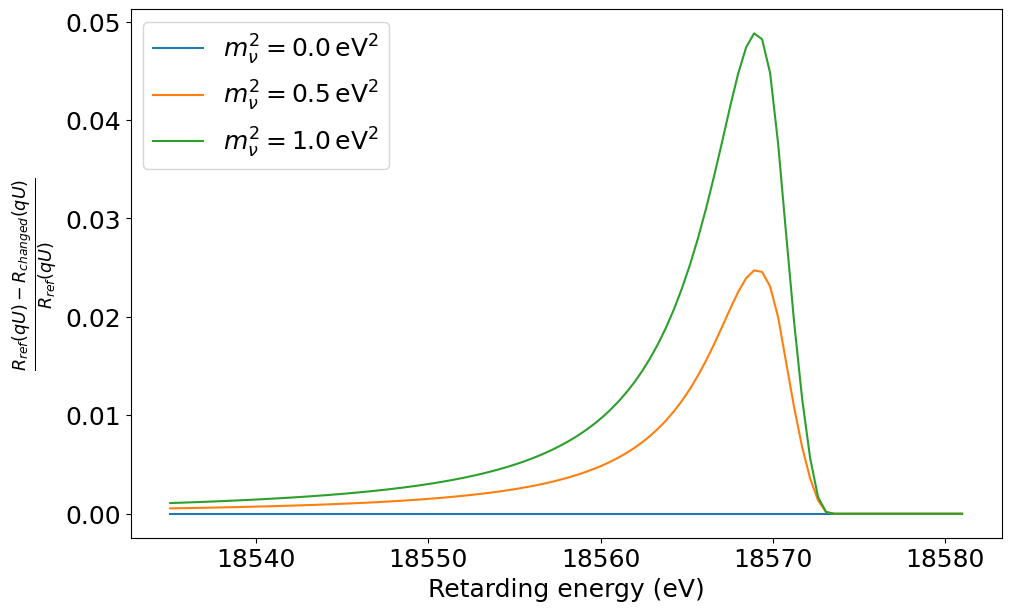

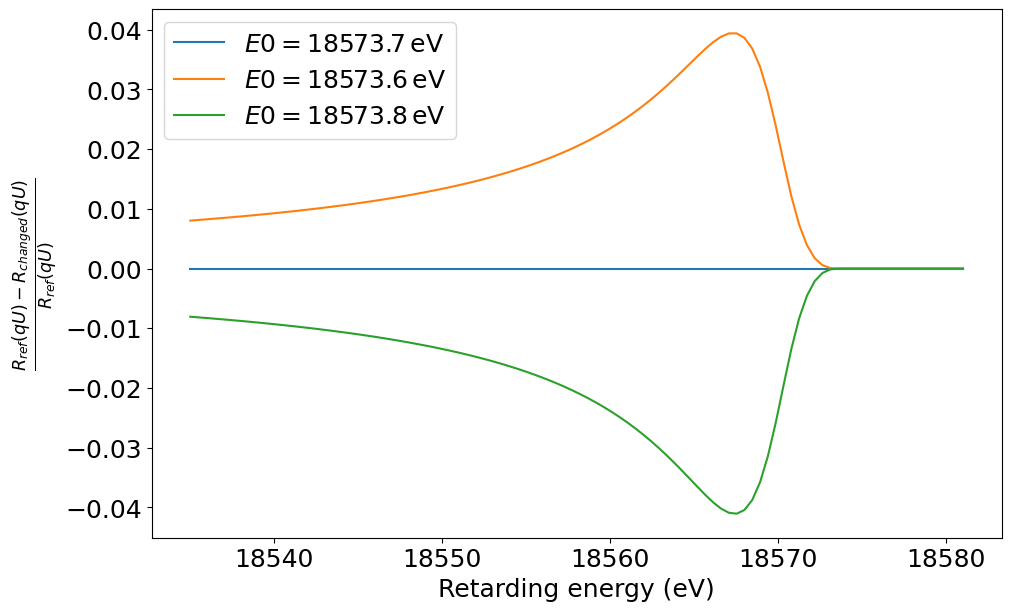

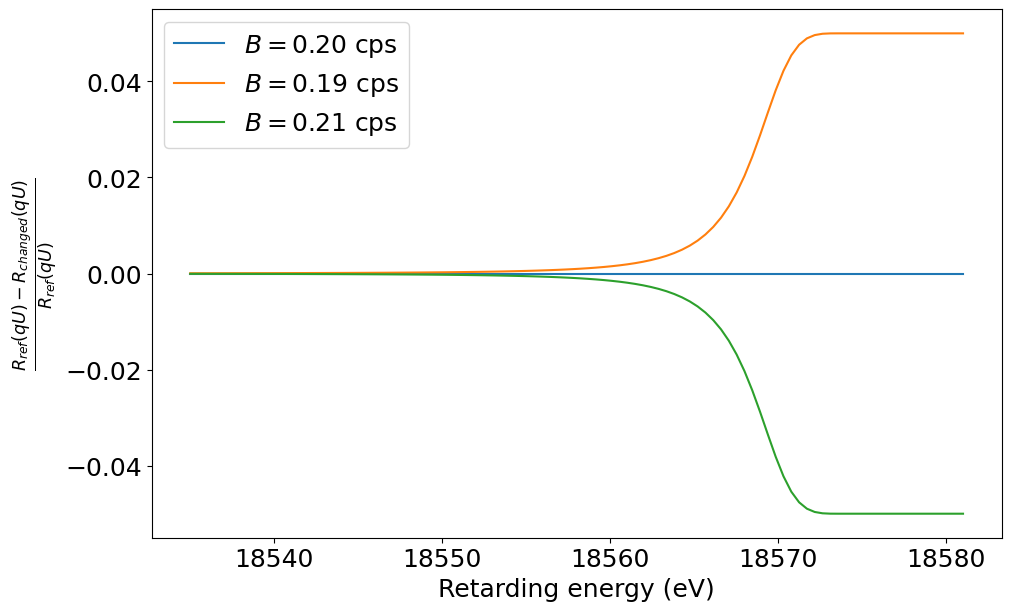

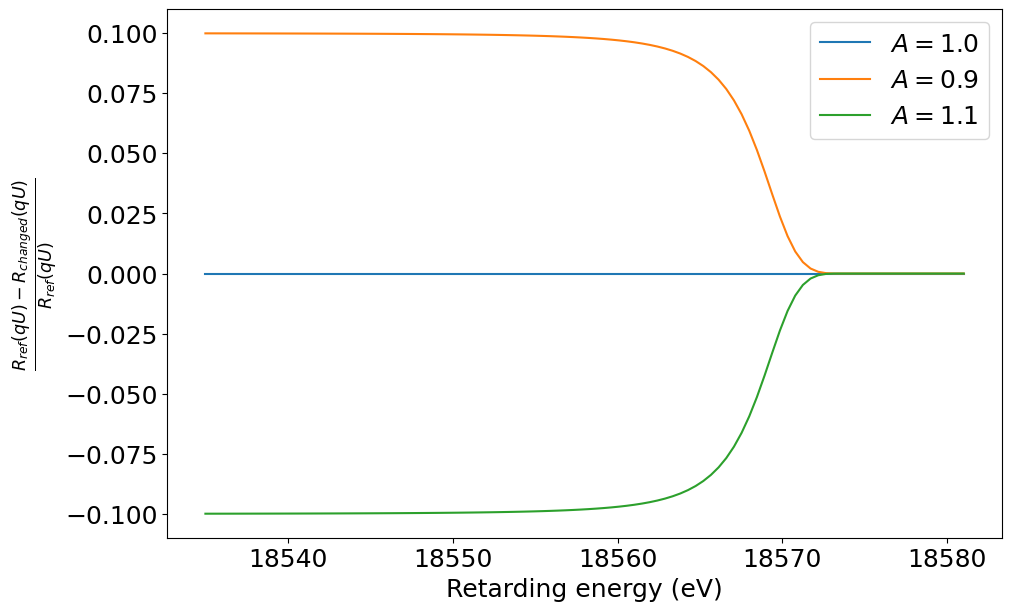

In [33]:

#different mnu
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

for _mnu2 in mnu2s:
    ychanged = np.array([dummy_model(qU=_x, mnu2=_mnu2, E0=18573.7, B=0.2, A=1) for _x in x])
    ax.plot(x, (yref-ychanged)/yref, '-', label=r"$m_{\nu}^2=$"+f"{_mnu2:.1f}"+r"$\,$eV$^2$"); # insert relation of reference and changed spectrum
ax.legend();
plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel("$\\frac{R_{ref}(qU)-R_{changed}(qU)}{R_{ref}(qU)}$");
fig.savefig("mu.png")

#different E0
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

for _E0 in E0s:
    ychanged = np.array([dummy_model(qU=_x, mnu2=0, E0=_E0, B=0.2, A=1) for _x in x])
    ax.plot(x, (yref-ychanged)/yref, '-', label=r"$E0=$"+f"{_E0:.1f}"+r"$\,$eV"); # insert relation of reference and changed spectrum

ax.legend();
plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel("$\\frac{R_{ref}(qU)-R_{changed}(qU)}{R_{ref}(qU)}$");
fig.savefig("E0.png")


#different B
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

for _B in Bs:
    ychanged = np.array([dummy_model(qU=_x, mnu2=0, E0=18573.7, B=_B, A=1) for _x in x])
    ax.plot(x, (yref-ychanged)/yref, '-', label=r"$B=$"+f"{_B:.2f}"+r" cps"); # insert relation of reference and changed spectrum

ax.legend();
plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel("$\\frac{R_{ref}(qU)-R_{changed}(qU)}{R_{ref}(qU)}$");
fig.savefig("B.png")
#different A
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

for _A in As:
    ychanged_A = np.array([dummy_model(qU=_x, mnu2=0, E0=18573.7, B=0.2, A=_A) for _x in x])
    ax.plot(x, (yref-ychanged_A)/yref, '-', label=r"$A=$"+f"{_A:.1f}"); # insert relation of reference and changed spectrum

ax.legend();
plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel("$\\frac{R_{ref}(qU)-R_{changed}(qU)}{R_{ref}(qU)}$");
fig.savefig("A.png")
# repeat this part of code for the other three parameters



In [36]:
Back=0.2

def root_search(x):
    return (dummy_model(qU=x, mnu2=0, E0=18573.7, B=0.2 , A=1) - Back )  # complete the relation so that the return statement becomes negative at the point where signal=background
print(f"The signal-to-background ratio is 1 at qU={optimize.root_scalar(root_search, bracket=(18535, 18581)).root:.2f}")

The signal-to-background ratio is 1 at qU=18581.00


/tmp/ipykernel_152082/1860661297.py:6: RuntimeWarning: invalid value encountered in sqrt
  T = np.nan_to_num( (1-np.sqrt(1-f*Bsource/Bana*(E-qU)/E) )/ (1-np.sqrt(1-Bsource/Bmax))   )


### 4.2 Basics of Data Analysis ###

In [18]:
def simplified_model(E: float, mnu2: float, E0: float, B: float, A: float) -> float:
    """Simplified (differential) model.

    Parameters
    ----------
    E: Energy.
    mnu2: Neutrino mass squared.
    E0: Endpoint.
    B: Background.
    A: Normalization.

    Returns
    ----------
    Model rate at qU.
    """
    return A*differential_spectrum(E=E, mnu2=mnu2, E0=E0)+B

### 4.2.1 Monte Carlo Data ###

In [19]:
# MTD
Elin = np.linspace(18535, 18581, 24)
ttot = 750 * 24 * 3600 # give total time in seconds
tlin = np.ones(24)*ttot/24


[16.124515972424078, 14.521955301457991, 13.004275418600521, 11.571491538127912, 10.223618873103712, 8.960672635379076, 7.78266803559291, 6.689620283172569, 5.681544586334007, 4.758456152082184, 3.920370186211456, 3.1673018933059076, 2.4992664767397343, 1.91627913867763, 1.418355080075086, 1.0055095006788146, 0.677757599027071, 0.4351145724500477, 0.2775956170702161, 0.20521592780269693, 0.2, 0.2, 0.2, 0.2]


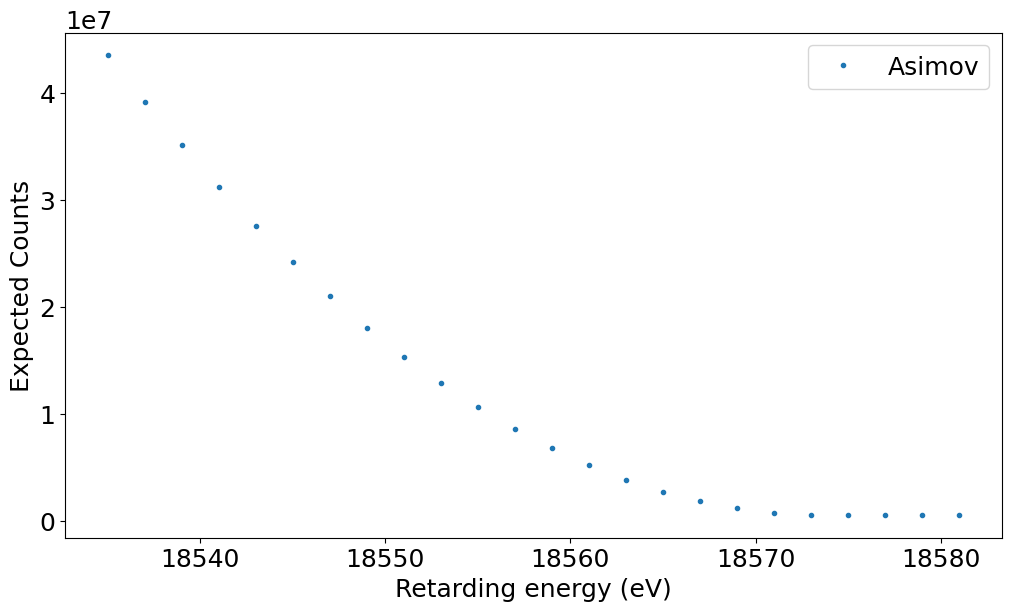

In [20]:
# # Calculate Asimov spectrum
# x = np.linspace(18535,  18581, num=100)
# rate_asimov = simplified_model(E=Elin, mnu2=0, E0= 18573.7, A=1, B=0.2)
# counts_asimov = rate_asimov*tlin*ttot

# # Plot Asimov spectrum
# plt.rcParams.update({'font.size':18});
# fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
# ax.plot(Elin, counts_asimov, '.', label="Asimov");

# plt.locator_params(axis='x', nbins=6);
# ax.set_xlabel("Retarding energy (eV)");
# ax.set_ylabel("MISSING");
# ax.legend();


# Calculate the Asimov spectrum again with corrected parameters
rate_asimov = []
for Ei in Elin:
    rate_asimov.append(simplified_model(E=Ei, mnu2=0, E0=18573.7, A=1, B=0.2))  # Rates in cps
counts_asimov = rate_asimov * tlin# Counts expected at each energy point
print(rate_asimov)
# Plot Asimov spectrum
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 6))
ax.plot(Elin, counts_asimov, '.', label="Asimov")

plt.locator_params(axis='x', nbins=6)
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel("Expected Counts")  # Corrected ylabel
ax.legend()
fig.savefig("asimov.pdf")

plt.show()



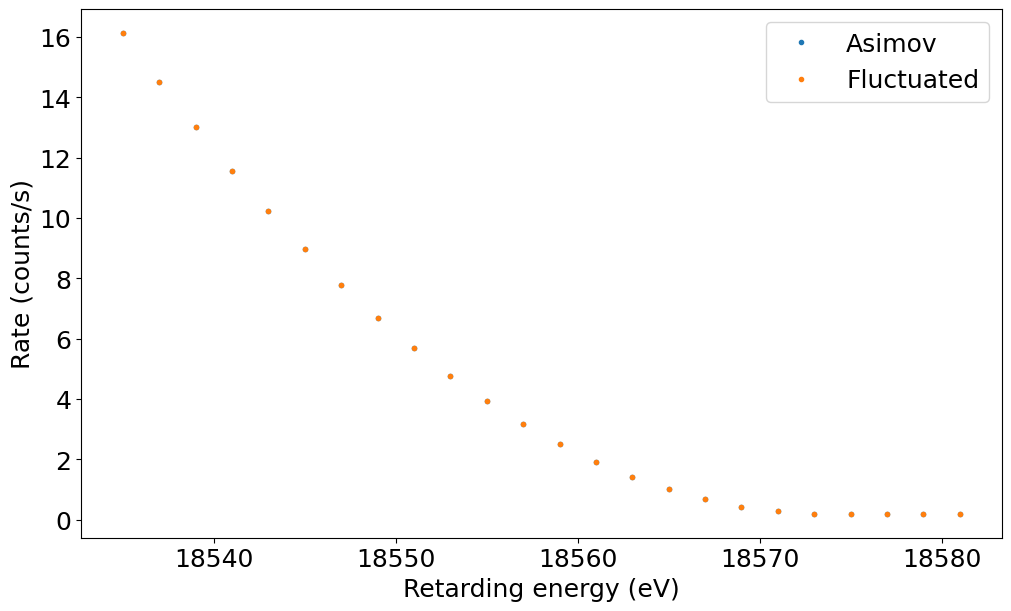

In [21]:
# Generate fluctuated spectra

fluctuated_spectra = []
for c in counts_asimov:
    fluctuated_spectra.append(np.random.poisson(lam=c, size=1000))
fluctuated_spectra = np.array(fluctuated_spectra).T # fluctuated spectra are given in counts per energy point

# Plot one together with the Asimov one
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, rate_asimov, '.', label="Asimov");
ax.plot(Elin, fluctuated_spectra[0]*24/ttot, '.', label="Fluctuated"); # with "MISSING" you convert counts to rate

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)");
ax.set_ylabel("Rate (counts/s)");
ax.legend();

fig.savefig("fluctuated_spectrum.pdf")

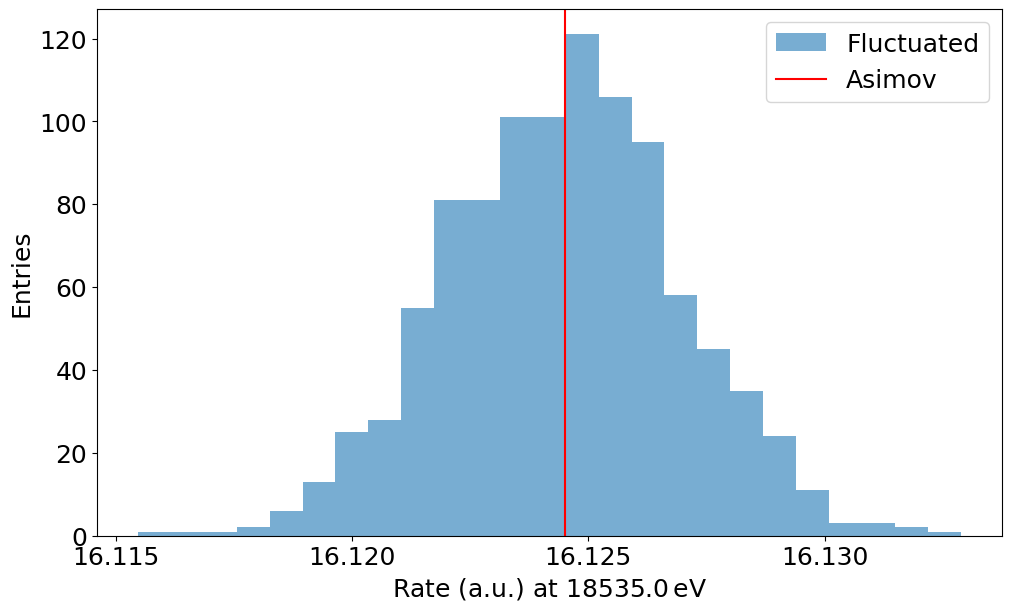

In [22]:
# Plot one qU point as cross-check

qUIndex = 0 # Get the point in the spectrum by index
asimov = counts_asimov[qUIndex]/(tlin[qUIndex]) # with "MISISNG" you convert counts to rate
fluctuated = fluctuated_spectra[:, qUIndex]/(tlin[qUIndex]) # with "MISISNG" you convert counts to rate

plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.hist(fluctuated, bins=25, alpha=0.6, label=f"Fluctuated")
ax.axvline(asimov, color = 'red' , label="Asimov")

plt.locator_params(axis='x', nbins=5);
ax.set_xlabel(f"Rate (a.u.) at {Elin[qUIndex]:.1f}" +r"$\,$eV");
ax. ticklabel_format(useOffset=False)
ax.set_ylabel("Entries");
ax.legend();

fig.savefig("fluctuated_spectrum_hist.pdf")


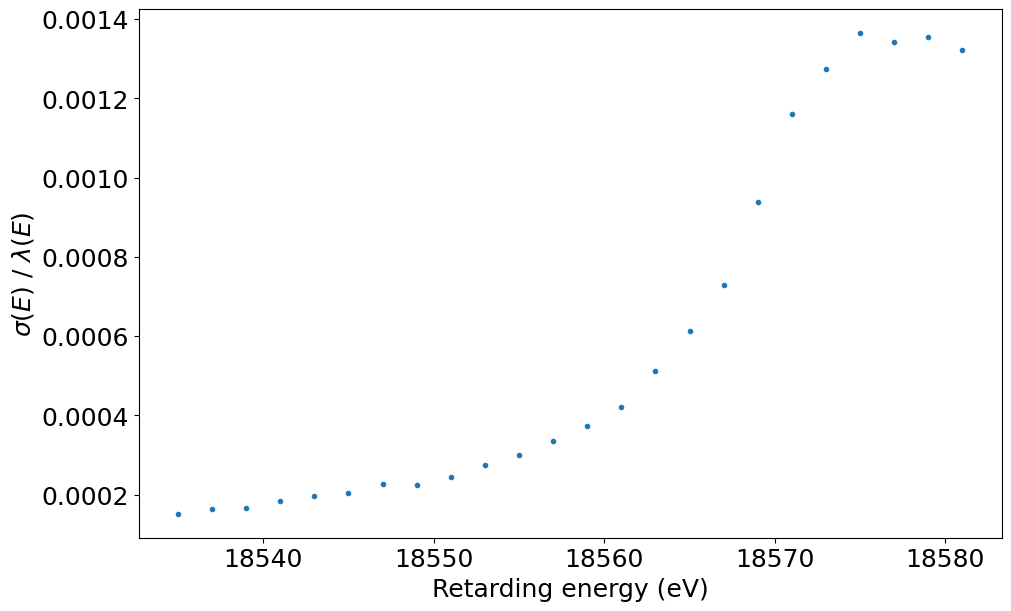

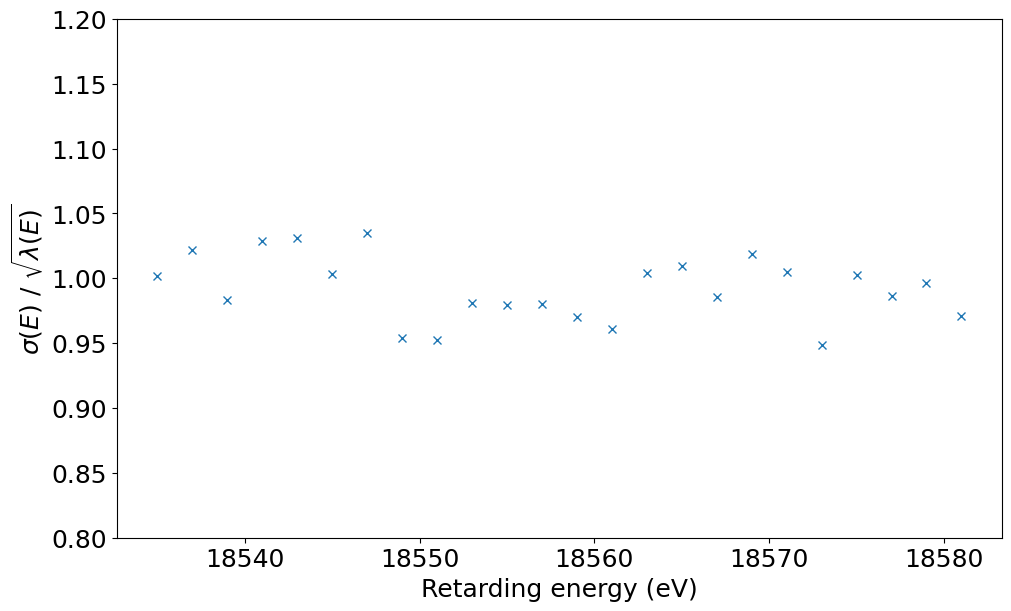

In [23]:
# Calculate standard deviation at each E
sigma = np.std(fluctuated_spectra, axis=0)

# Plot the standard deviation vs lambda
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, sigma / counts_asimov, '.');

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)");
ax.set_ylabel(r"$\sigma(E)$ / $\lambda(E)$");

fig.savefig("sigma_lambda.pdf")

# Plot the standard deviation vs the expectation (=sqrt(counts))
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, sigma / np.sqrt(counts_asimov), 'x');
ax.set_ylim(0.8,1.2)
plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel(r"$\sigma(E)$ / $\sqrt{\lambda(E)}$");

fig.savefig("sigma.pdf")


### 4.2.2 Parameter Inference ###

In [24]:
def chisquared(func, xdata: np.array, ydata: np.array, pmodel: np.array, sigma: np.array) -> float:
    """Returns the chi squared for given function and values.

    Parameters
    ----------
    func: Model function.
    xdata: Data of the x-axis.
    ydata: Data of the y-axis. Must have the same shape as xdata.
    pmodel: Model parameters
    sigma: Uncertainty of ydata. Must have the same shape as xdata of has to be a float.

    Returns
    ----------
    Chi Squared for model and values.
    """
    return np.sum(((func(xdata, *pmodel)-ydata)/sigma)**2)

In [25]:
# Define chi2 as a function of parameters for fixed Asimov data
def chi2(params) -> float:
    """Return the chi2 as a function of params"""
    mnu2, E0, B, N = params
    xdata = Elin
    ydata = rate_asimov
    sigma = np.sqrt(counts_asimov)/tlin # sigma is here the uncertainty on the rate
    return chisquared(func=simplified_model, xdata=xdata, ydata=ydata, pmodel=params, sigma=sigma)

In [26]:
# Fit Asimov data using chi2 minimization
# Initial value for parameters
x0 = (0.00001, 18573.7, 0.9, 0.2) # change one parameter value slightly with regard to the reference values to ensure correct minimization
# Minimize
result_asimov = optimize.minimize(chi2, x0=x0, method="Nelder-Mead", tol=1e-8)
print("### Fit on Asimov data ###")
print("Best fit at: ", result_asimov.x)
print(f"Chi2 = {result_asimov.fun}")

### Fit on Asimov data ###
Best fit at:  [-3.01097875e-05  1.85737000e+04  1.99999963e-01  1.00000005e+00]
Chi2 = 3.203460996569816e-07


In [27]:
# Do the same on fluctuated data
Parameters = []
for i, dataset in enumerate(fluctuated_spectra):
    # Print progress
    print(f"Progress: {(i+1)/len(fluctuated_spectra)*1E2:.1f}%", end="\r", flush=True)
    # Adapt definition of chi2 for different data
    def _chi2(params) -> float:
        """Return the chi2 as a function of params"""
        xdata = Elin
        ydata = dataset/tlin # the second "MISSING" converts counts to rate
        sigma = np.sqrt(dataset)/tlin
        return chisquared(func=simplified_model, xdata=xdata, ydata=ydata, pmodel=params, sigma=sigma)
    # Initial value for parameters
    x0 = (0.1, 18573.7, 0.2, 1.0)
    # Minimize
    result = optimize.minimize(_chi2, x0=x0, method="Nelder-Mead", tol=1e-8)
    if result.success:
        Parameters.append([*result.x, result.fun])
    else:
        print(f"Minimization did not converge")
Parameters = np.array(Parameters)

/tmp/ipykernel_152082/3479775738.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(C*F*p*(E+me)*(E0-E)*np.sqrt((E0-E)**2-mnu2)) * np.heaviside(E0-E-mnu, 1) # formula for the differential spectrum


[[-6.37421733e-02  1.85736985e+04  1.99938578e-01  1.00005302e+00
   1.59114324e+01]
 [ 8.25908599e-03  1.85737002e+04  2.00056204e-01  9.99978780e-01
   3.12835771e+01]
 [ 3.60351057e-02  1.85737012e+04  2.00020858e-01  9.99859560e-01
   3.06358100e+01]
 ...
 [ 6.53553667e-02  1.85737034e+04  2.00018648e-01  9.99834827e-01
   2.49735215e+01]
 [ 2.14300833e-02  1.85737023e+04  1.99885241e-01  9.99814778e-01
   2.71600034e+01]
 [-3.74229801e-03  1.85737019e+04  2.00017424e-01  9.99867752e-01
   1.95272103e+01]]
Mean of $m_{\nu}^2$ (eV$^2$): -9.584236324968498e-05
Standard deviation of $m_{\nu}^2$ (eV$^2$): 0.049569093126834454
Mean of $E_{0}$ (eV): 18573.70005626431
Standard deviation of $E_{0}$ (eV): 0.0025995471921616787
Mean of $B$ (cps): 0.19999945122084933
Standard deviation of $B$ (cps): 0.00013095427788665758
Mean of N: 0.9999949046184576
Standard deviation of N: 0.00017631859295850997
Mean of $\chi^2$: 19.950465174704558
Standard deviation of $\chi^2$: 6.394505020748989


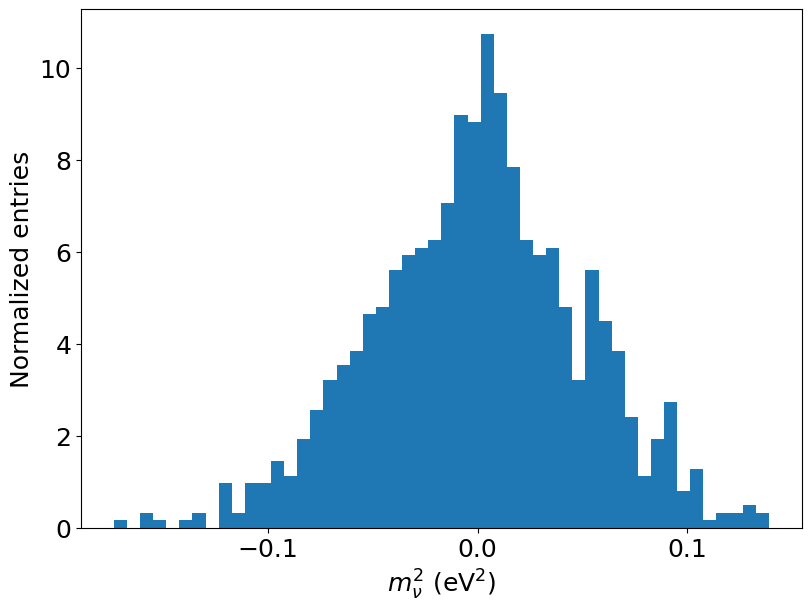

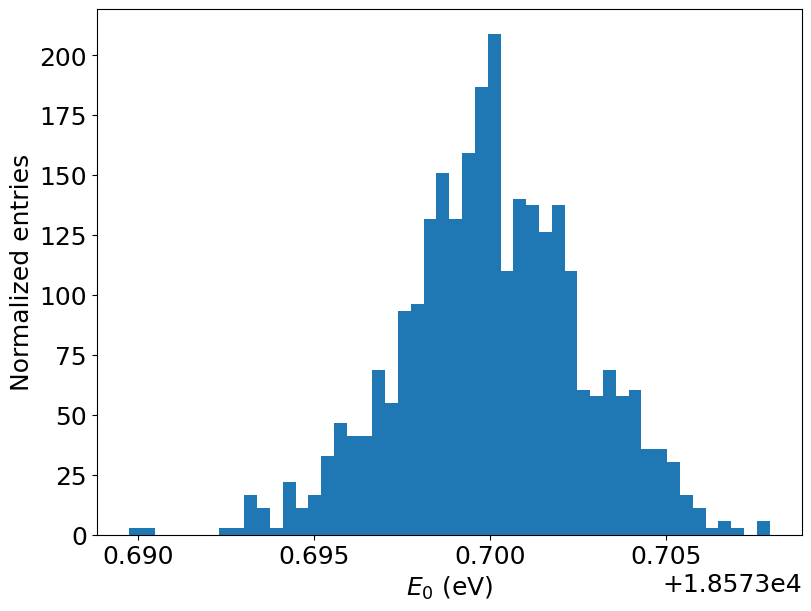

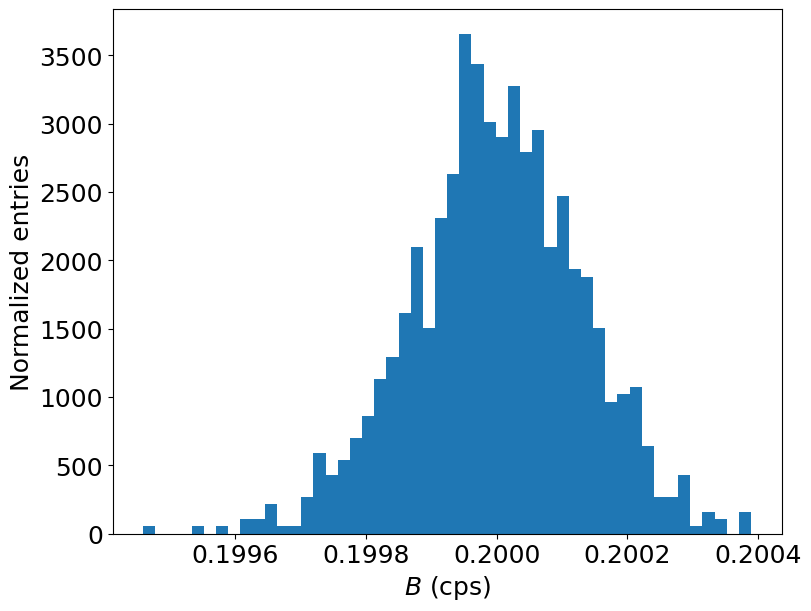

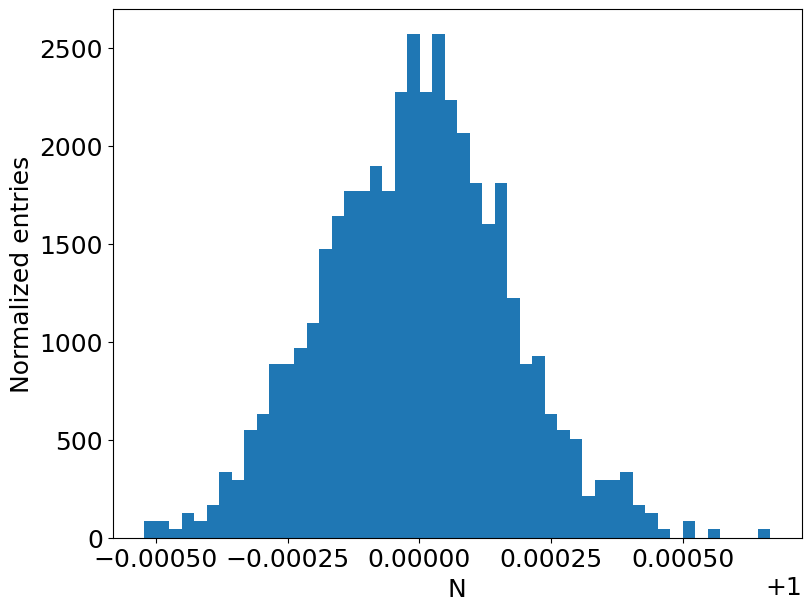

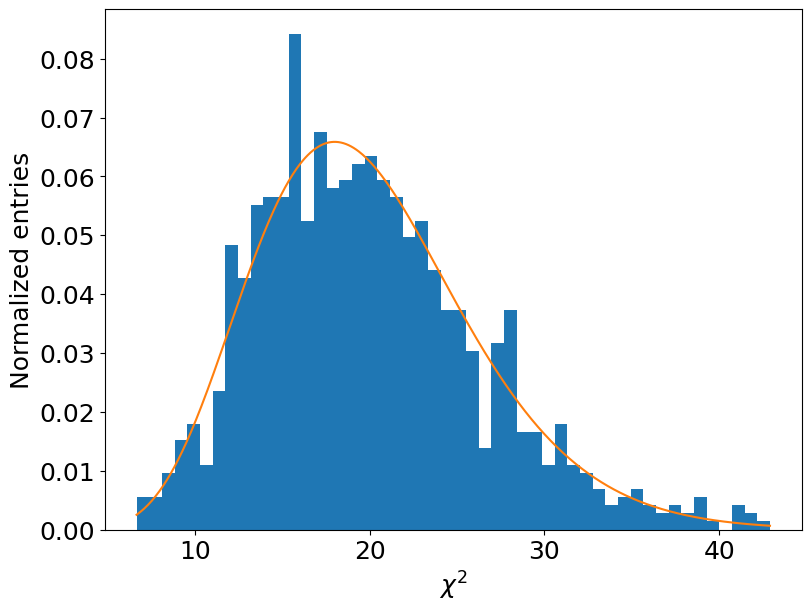

In [28]:
# Plot parameter distributions
print(Parameters)
Labels = [r"$m_{\nu}^2$ (eV$^2$)", r"$E_{0}$ (eV)", r"$B$ (cps)", r"N", r"$\chi^2$"]

for param, label in zip(Parameters.T, Labels):
    plt.rcParams.update({'font.size':18});
    fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True);
    ax.hist(param, bins=50, density=True)

    plt.locator_params(axis='x', nbins=6);
    ax.set_xlabel(label)
    ax.set_ylabel("Normalized entries")

    if label == r"$\chi^2$":
        xlin = np.linspace(np.min(param), np.max(param), 500)
        ylin = stats.chi2.pdf(xlin, df=len(fluctuated_spectra[0])-len(x0)) # degrees of freedom (df) are number of data points - number of fit parameters
        ax.plot(xlin, ylin, color="tab:orange")

    #parse latex label to text to save the figure
    plaintextlabel = str(Labels.index(label))



    fig.savefig(f"{plaintextlabel}.pdf")

    #calcualte and print mean value and standard deviation
    mean = np.mean(param)
    std = np.std(param)
    print(f"Mean of {label}: {mean}")
    print(f"Standard deviation of {label}: {std}")

### 4.2.3 Uncertainty and Sensitivity ###

In [92]:
def profile(mnu2):
    """For given mnu2, minimize the chi2 w.r.t. the other parameters"""
    # Define chi2 as a function of parameters without neutrino mass for fixed Asimov data
    def chi2(params) -> float:
        """Return the chi2 as a function of params"""
        E0, B, N = params # Hint: neutrino mass is now no longer a free fit parameter
        xdata = Elin
        ydata = rate_asimov # use the Asimov data
        sigma = np.sqrt(dataset)/tlin
        return chisquared(func=simplified_model, xdata=xdata, ydata=ydata, pmodel=[mnu2, *params], sigma=sigma)
    # Initial guess
    x0 = (18573.7, 0.9, 0.2)
    # Minimize
    result = optimize.minimize(chi2, x0=x0, method="Nelder-Mead")
    if result.success:
        return result.fun
    else:
        print(f"Not converged for mnu2={mnu2}")

def root_search(mnu2):
    """Return difference of chi square distribution to 1"""
    return (profile(mnu2)-result_asimov.fun) - 1
 # complete the relation so that the return statement becomes negative if \Delta chi^2 = 1

In [93]:
result_upper = optimize.root_scalar(root_search, bracket=(0, 5))
if result_upper.converged:
    mnu2_upper = result_upper.root
else:
    print(f"Not converged")
result_lower = optimize.root_scalar(root_search, bracket=(-5, 0))
if result_lower.converged:
    mnu2_lower = result_lower.root
else:
    print(f"Not converged")
print(mnu2_lower, mnu2_upper)

/tmp/ipykernel_32220/3479775738.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(C*F*p*(E+me)*(E0-E)*np.sqrt((E0-E)**2-mnu2)) * np.heaviside(E0-E-mnu, 1) # formula for the differential spectrum


-0.05422618802069397 0.05211030243161946


/tmp/ipykernel_32220/3479775738.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.nan_to_num(C*F*p*(E+me)*(E0-E)*np.sqrt((E0-E)**2-mnu2)) * np.heaviside(E0-E-mnu, 1) # formula for the differential spectrum


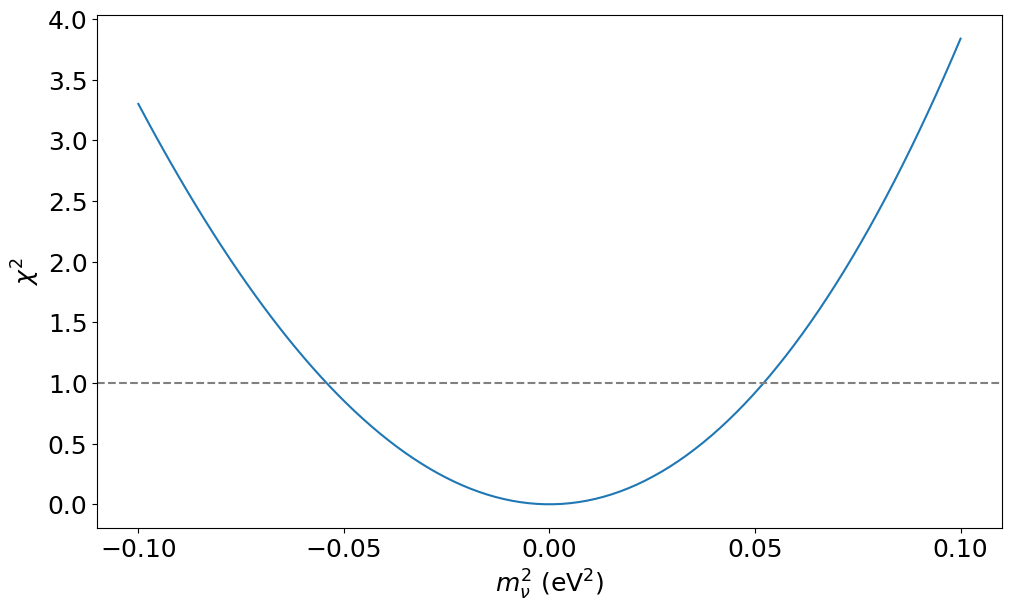

In [94]:
# Plot a chi2 profile

fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

# Range of mnu2
x = np.linspace(-0.1, 0.1, 100)
y = np.array([profile(_x) for _x in x])
ax.plot(x, y)

# Plot horizontal lines
ax.axhline(result_asimov.fun+1, ls="--", color="gray")

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel(r"$m_{\nu}^2$ (eV$^2$)");
ax.set_ylabel(r"$\chi^2$");

fig.savefig("chi2_profile.pdf")

In [62]:
print(f"Sensitivity is {np.sqrt(1.645*mnu2_upper):.2f} eV") # insert factor for 90 % C.L.

Sensitivity is 0.29 eV
